# Задание 1
## Вариант 10
N = 9 
L = 2 

In [12]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

dpi = 10000
def sum(func, nu, k_l, k_u, real_part):
    res = 0
    for k in range(k_u - k_l):
        if real_part:
            res += func(k + k_l) * np.cos(-2*np.pi*(k + k_l)*nu)
        else:
            res += func(k + k_l) * np.sin(-2*np.pi*(k + k_l)*nu)
    return res

def get_transform(func, nu_l, nu_u, real_part, k_l, k_u):
    step = (nu_u - nu_l) / dpi
    nu = nu_l
    res = np.array([])
    for step_num in range(dpi):
        nu += step
        res = np.append(res, sum(func, nu, k_l, k_u, real_part))
    return res

#Принимает функцию от k. Cуммирует ее от k_l до k_u 
def DTFT(func, nu_l, nu_u, k_l=-1000, k_u=1000, res_type='abs'):
    if res_type == 'abs':
        Re = np.array(get_transform(func, nu_l, nu_u, True, k_l, k_u))
        Im = np.array(get_transform(func, nu_l, nu_u, False, k_l, k_u))
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array(get_transform(func, nu_l, nu_u, True, k_l, k_u))
        return Re
    elif res_type=="Im":
        Im=np.array(get_transform(func, nu_l, nu_u, False, k_l, k_u))
        return Im 

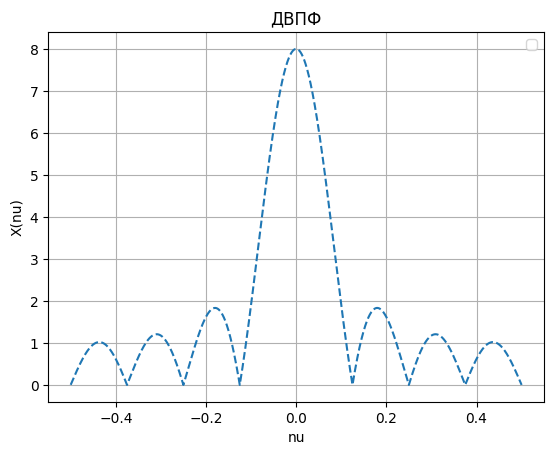

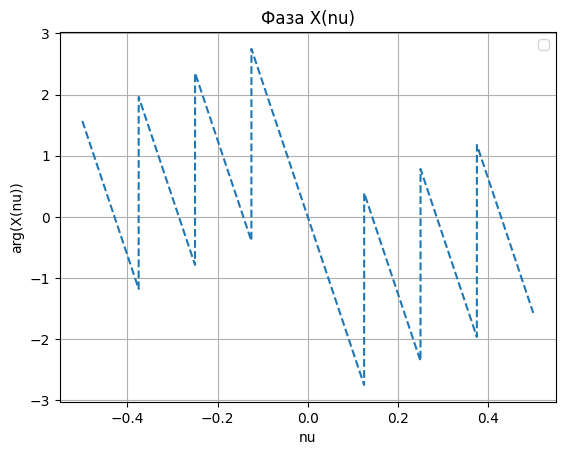

In [13]:
import Plot

def one_func(k):
    return 1

def draw_graph():
    func = Plot.PlotFunction()
    nu_l = -0.5
    nu_u = 0.5
    arrayX = np.linspace(nu_l, nu_u, dpi)
    func.set_arrayX(arrayX)
    func.set_arrayY(DTFT(one_func, nu_l, nu_u, 0, 8))

    phase = Plot.PlotFunction()
    phase.set_arrayX(arrayX)
    phase.set_arrayY(np.angle(DTFT(one_func, nu_l, nu_u, 0, 8, 'Re') + 1j*DTFT(one_func, nu_l, nu_u, 0, 8, 'Im')))

    plot_func = Plot.MyPlot()
    plot_func.add_function(func)
    plot_func.config_plot('ДВПФ', 'nu', 'X(nu)')
    plot_func.draw_all()

    plot_phase = Plot.MyPlot()
    plot_phase.add_function(phase)
    plot_phase.config_plot('Фаза X(nu)', 'nu', 'arg(X(nu))')
    plot_phase.draw_all()

    Plot.MyPlot.show_all()

draw_graph()